In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 3})
sns.set_style('whitegrid',
              {'grid.linestyle': ':', 'grid.color': 'red', 'axes.edgecolor': '0.5',
               'axes.linewidth': 1.2, 'legend.frameon': True})

import os, glob, copy

import pickle

In [2]:
npart = 1000
nturns = 20000

# All error seeds:

In [10]:
e_seeds = sorted([int(f.split('_')[-1]) for f in glob.glob('error_tables/errors_55_55_*')])
e_seeds

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
tune_range_qx = np.arange(18.55, 18.951, 0.01)
tune_range_qy = np.arange(18.55, 18.961, 0.01)

# e_seed = 1

In [18]:
losses = np.zeros((len(e_seeds), len(tune_range_qx), len(tune_range_qy)))
std_x = np.zeros_like(losses)
std_y = np.zeros_like(losses)

for k, e_seed in enumerate(e_seeds):
    for i, qx in enumerate(tune_range_qx):
        for j, qy in enumerate(tune_range_qy):
            qqx, qqy = int(np.round((qx%1) * 100)), int(np.round((qy%1) * 100))

            filename_error_table = "errors_{qqx}_{qqy}_{eseed:d}".format(
                qqx=qqx, qqy=qqy, eseed=e_seed)

            try:
                store = pickle.load(open('results/' + filename_error_table + '_summary.p', 'rb'))
            except FileNotFoundError:
                try:
                    store = pickle.load(open('results_old/' + filename_error_table + '_summary.p', 'rb'))
                except FileNotFoundError:
                    losses[k, i, j] = np.nan
                    std_x[k, i, j] = np.nan
                    std_y[k, i, j] = np.nan
                    continue

            losses[k, i, j] = store['losses']
            std_x[k, i, j] = store['std_x']
            std_y[k, i, j] = store['std_y']

In [22]:
mlosses = np.mean(losses, axis=0)
mstd_x = np.mean(std_x, axis=0)
mstd_y = np.mean(std_y, axis=0)

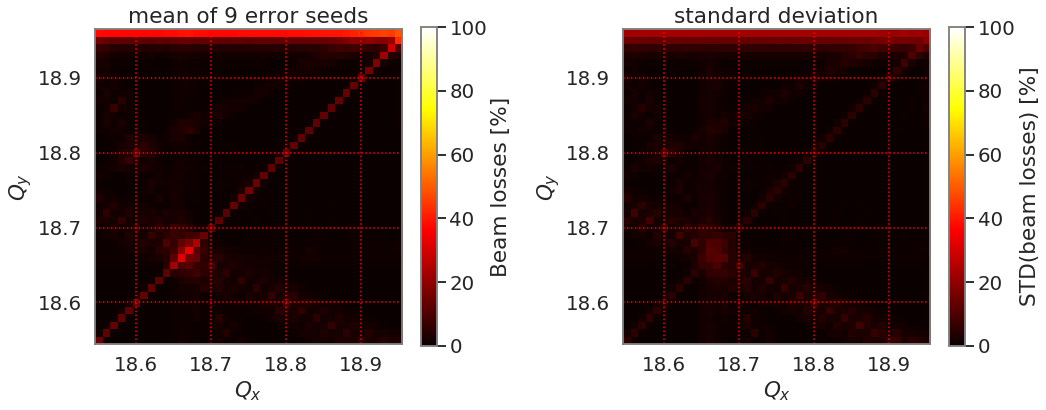

In [34]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plt.sca(ax[0])
plt.title('mean of {} error seeds'.format(len(e_seeds)))
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - mlosses.T / 10., origin='lower', vmin=0, vmax=100,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')

plt.sca(ax[1])
plt.title('standard deviation')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    np.std(100 - losses / 10., axis=0).T, origin='lower', vmin=0, vmax=100,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('STD(beam losses) [%]')

plt.tight_layout()
plt.savefig('tunescan_alleseeds_losses_100.pdf', bbox_inches='tight')

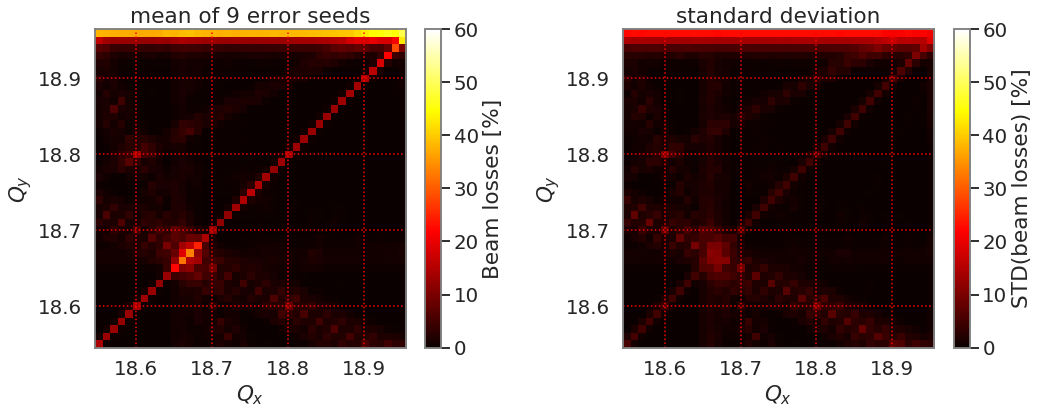

In [35]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plt.sca(ax[0])
plt.title('mean of {} error seeds'.format(len(e_seeds)))
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - mlosses.T / 10., origin='lower', vmin=0, vmax=60,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')

plt.sca(ax[1])
plt.title('standard deviation')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    np.std(100 - losses / 10., axis=0).T, origin='lower', vmin=0, vmax=60,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('STD(beam losses) [%]')

plt.tight_layout()
plt.savefig('tunescan_alleseeds_losses_60.pdf', bbox_inches='tight')

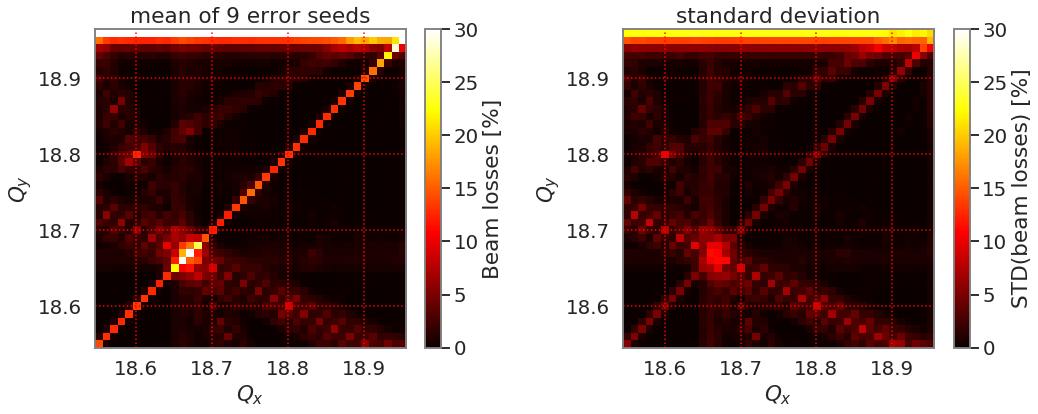

In [36]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plt.sca(ax[0])
plt.title('mean of {} error seeds'.format(len(e_seeds)))
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - mlosses.T / 10., origin='lower', vmin=0, vmax=30,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')

plt.sca(ax[1])
plt.title('standard deviation')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    np.std(100 - losses / 10., axis=0).T, origin='lower', vmin=0, vmax=30,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('STD(beam losses) [%]')

plt.tight_layout()
plt.savefig('tunescan_alleseeds_losses_30.pdf', bbox_inches='tight')

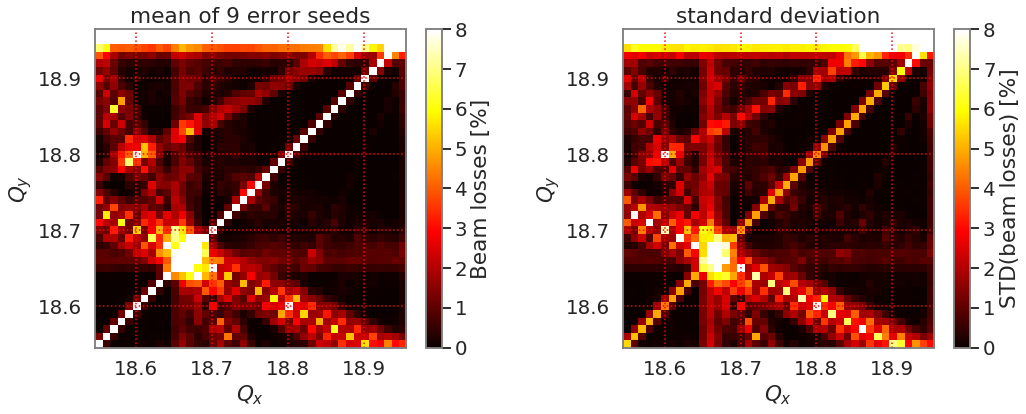

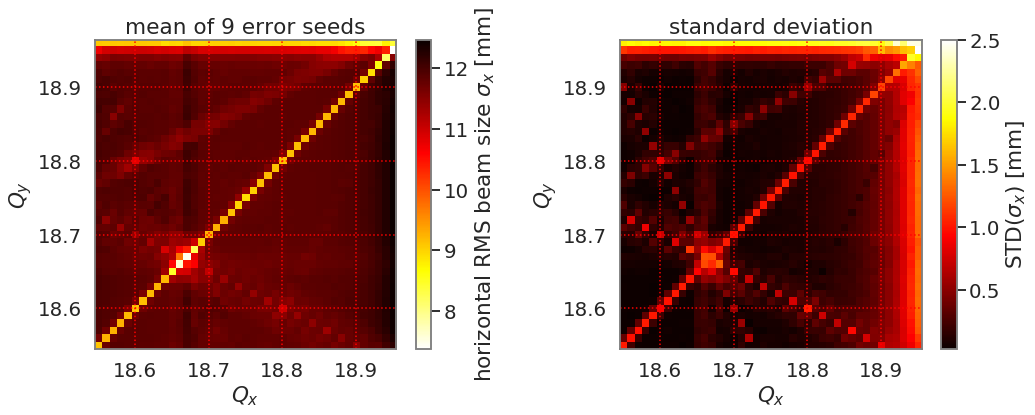

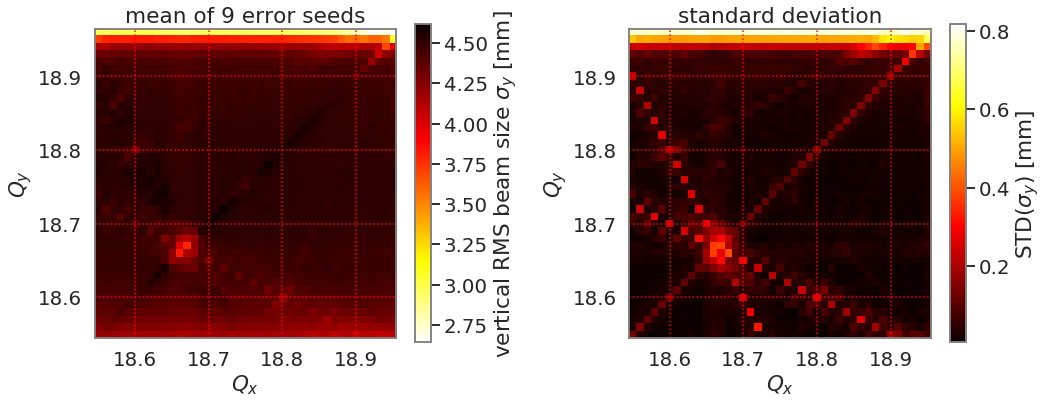

In [39]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

### loss

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plt.sca(ax[0])
plt.title('mean of {} error seeds'.format(len(e_seeds)))
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - mlosses.T / 10., origin='lower', vmin=0, vmax=8,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')

plt.sca(ax[1])
plt.title('standard deviation')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    np.std(100 - losses / 10., axis=0).T, origin='lower', vmin=0, vmax=8,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('STD(beam losses) [%]')

plt.tight_layout()
plt.savefig('tunescan_alleseeds_losses.pdf', bbox_inches='tight')

# stdx

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plt.sca(ax[0])
plt.title('mean of {} error seeds'.format(len(e_seeds)))
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    1e3 * mstd_x.T, origin='lower',
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('horizontal RMS beam size $\sigma_x$ [mm]')

plt.sca(ax[1])
plt.title('standard deviation')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    1e3 * np.std(std_x, axis=0).T, origin='lower',
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('STD($\sigma_x$) [mm]')

plt.tight_layout()
plt.savefig('tunescan_alleseeds_sigx.pdf', bbox_inches='tight')

# stdy

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plt.sca(ax[0])
plt.title('mean of {} error seeds'.format(len(e_seeds)))
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    1e3 * mstd_y.T, origin='lower',
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('vertical RMS beam size $\sigma_y$ [mm]')

plt.sca(ax[1])
plt.title('standard deviation')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    1e3 * np.std(std_y, axis=0).T, origin='lower',
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('STD($\sigma_y$) [mm]')

plt.tight_layout()
plt.savefig('tunescan_alleseeds_sigy.pdf', bbox_inches='tight')

In [49]:
qqx, qqy = np.meshgrid(tune_range_qx, tune_range_qy)

np.savetxt('results.dat', 
           np.vstack(
               (qqx.flatten(), 
                qqy.flatten(), 
                mlosses.T.flatten(),
                np.std(losses, axis=0).T.flatten())
           ).T, fmt='%.2f', newline='\r\n', header='Qx\tQy\tSurvival mean\tSurvival std', delimiter='\t')

In [50]:
!cat results.dat

# `e_seed = 1`

In [4]:
losses = np.zeros((len(tune_range_qx), len(tune_range_qy)))
std_x = np.zeros_like(losses)
std_y = np.zeros_like(losses)

for i, qx in enumerate(tune_range_qx):
    for j, qy in enumerate(tune_range_qy):
        qqx, qqy = int(np.round((qx%1) * 100)), int(np.round((qy%1) * 100))

        filename_error_table = "errors_{qqx}_{qqy}_{eseed:d}".format(
            qqx=qqx, qqy=qqy, eseed=e_seed)

        try:
            store = pickle.load(open('results/' + filename_error_table + '_summary.p', 'rb'))
        except FileNotFoundError:
            try:
                store = pickle.load(open('results_old/' + filename_error_table + '_summary.p', 'rb'))
            except FileNotFoundError:
                losses[i, j] = np.nan
                std_x[i, j] = np.nan
                std_y[i, j] = np.nan
                continue
        
        losses[i, j] = store['losses']
        std_x[i, j] = store['std_x']
        std_y[i, j] = store['std_y']

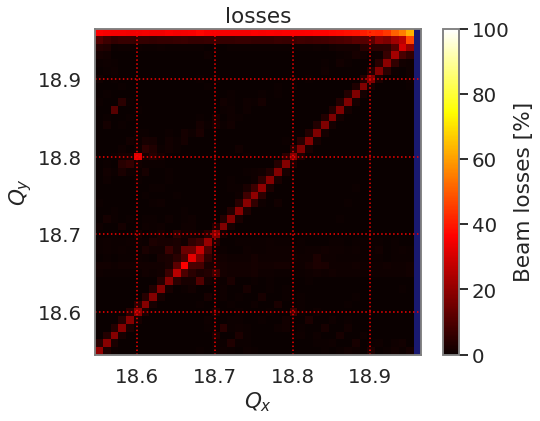

In [5]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=100,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses_100.pdf', bbox_inches='tight')

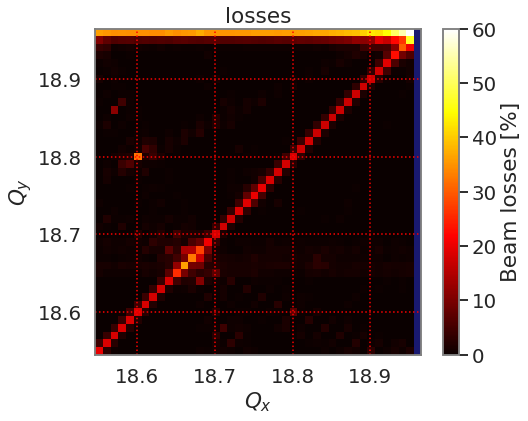

In [6]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=60,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses_60.pdf', bbox_inches='tight')

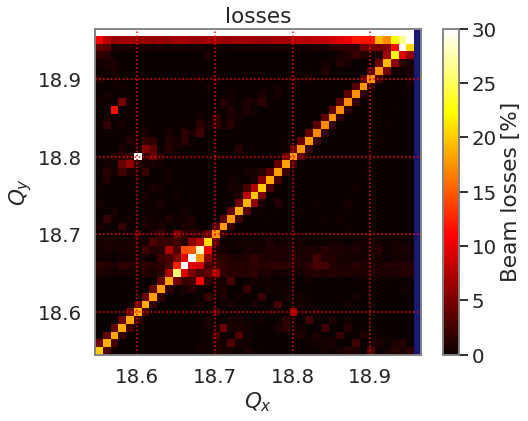

In [7]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=30,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses_30.pdf', bbox_inches='tight')

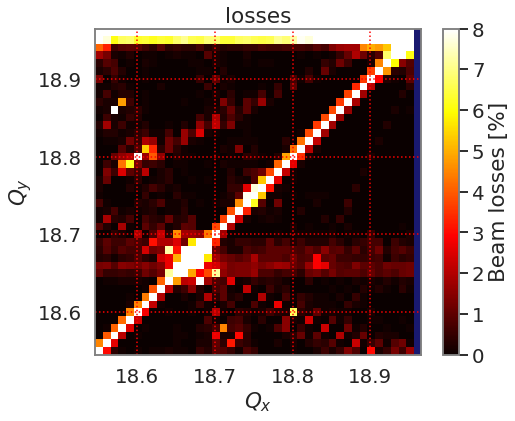

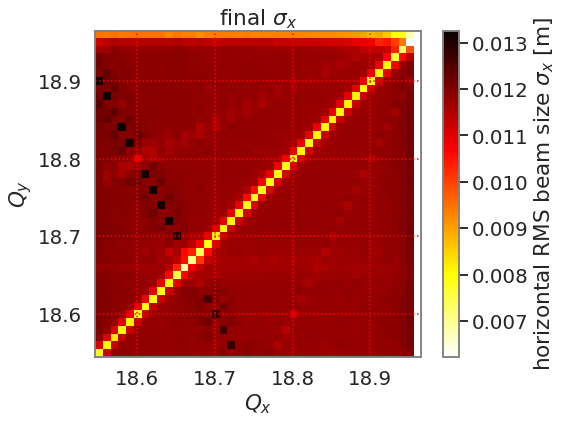

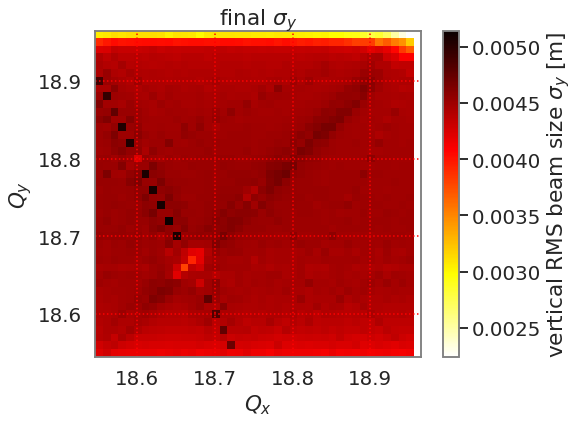

In [8]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=8,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_x$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_x.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('horizontal RMS beam size $\sigma_x$ [m]')
plt.savefig('tunescan_eseed1_sigx.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_y$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_y.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('vertical RMS beam size $\sigma_y$ [m]')
plt.savefig('tunescan_eseed1_sigy.pdf', bbox_inches='tight')

In [9]:
qqx, qqy = np.meshgrid(tune_range_qx[:-1], tune_range_qy)

np.savetxt('results.dat', 
           np.vstack(
               (qqx.flatten(), 
                qqy.flatten(), 
                losses.T[:, :-1].flatten())
           ).T, fmt='%.2f', newline='\r\n', header='Qx\tQy\tSurvival', delimiter='\t')

# Vera's results

In [10]:
!head -1 Vera_Tunes_Emittances.dat

In [11]:
vera_qx, vera_qy, vera_e_seed, _, _, vera_exi, vera_eyi, vera_exe, vera_eye, vera_losses = np.genfromtxt(
    'Vera_Tunes_Emittances.dat', skip_header=1, unpack=True)

In [12]:
vera_qx = 18 + np.unique(vera_qx) * 1e-2
vera_qy = 18 + np.unique(vera_qy) * 1e-2
vera_losses = vera_losses.reshape((len(vera_qx), len(vera_qy)))

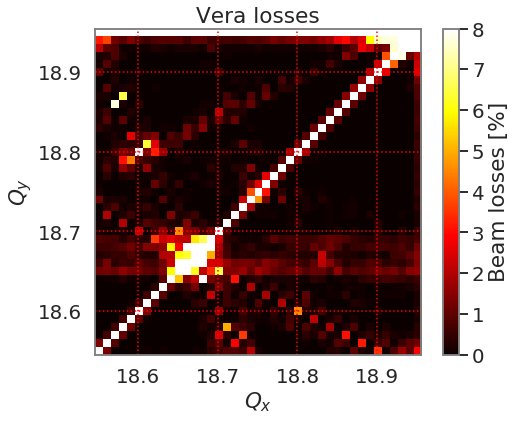

In [13]:
dqx, dqy = np.diff(vera_qx)[0], np.diff(vera_qy)[0]
extent = [
    vera_qx[0] - dqx/2., vera_qx[-1] + dqx/2.,
    vera_qy[0] - dqy/2., vera_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('Vera losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    100 - vera_losses.T / 10., origin='lower', vmin=0, vmax=8,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')

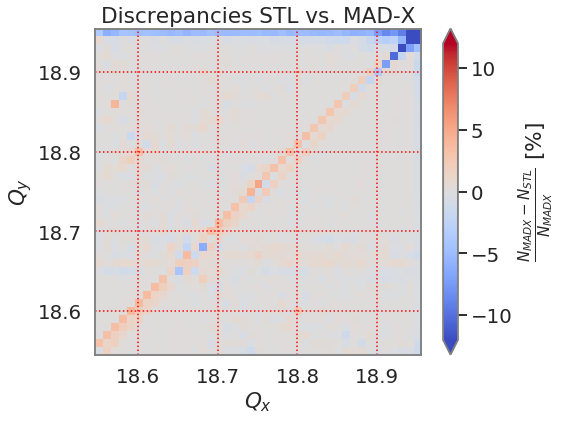

In [14]:
dqx, dqy = np.diff(vera_qx)[0], np.diff(vera_qy)[0]
extent = [
    vera_qx[0] - dqx/2., vera_qx[-1] + dqx/2.,
    vera_qy[0] - dqy/2., vera_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('Discrepancies STL vs. MAD-X')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(100 * (vera_losses.T - losses.T[:-1, :-1]) / vera_losses.T, origin='lower',
    extent=extent, cmap=plt.get_cmap('coolwarm'))
cbar = plt.colorbar(extend='both')
plt.clim(-12, 12);
cbar.set_label(r'$\frac{N_{MADX} - N_{STL}}{N_{MADX}}$ [%]')

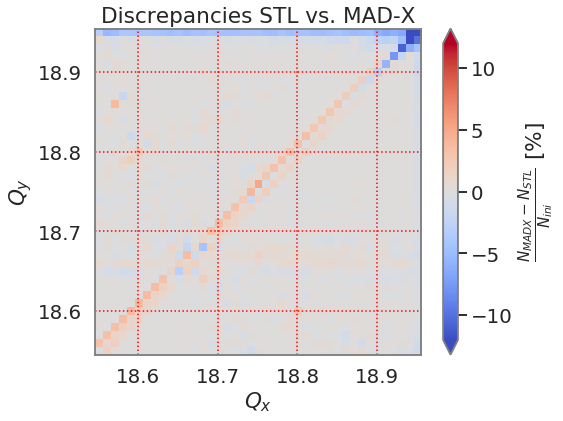

In [15]:
dqx, dqy = np.diff(vera_qx)[0], np.diff(vera_qy)[0]
extent = [
    vera_qx[0] - dqx/2., vera_qx[-1] + dqx/2.,
    vera_qy[0] - dqy/2., vera_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('Discrepancies STL vs. MAD-X')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(100 * (vera_losses.T - losses.T[:-1, :-1]) / 1000., origin='lower',
    extent=extent, cmap=plt.get_cmap('coolwarm'))
cbar = plt.colorbar(extend='both')
plt.clim(-12, 12);
cbar.set_label(r'$\frac{N_{MADX} - N_{STL}}{N_{ini}}$ [%]')

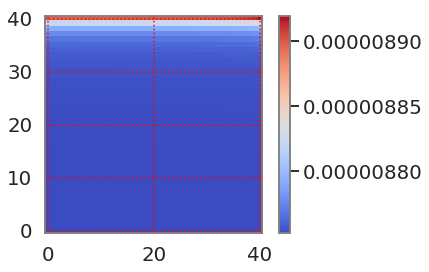

In [16]:
plt.imshow(vera_exi.reshape((len(vera_qx), len(vera_qy))), origin='lower',
    cmap=plt.get_cmap('coolwarm'))
cbar = plt.colorbar()

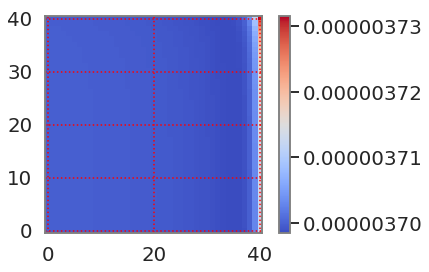

In [17]:
plt.imshow(vera_eyi.reshape((len(vera_qx), len(vera_qy))), origin='lower',
    cmap=plt.get_cmap('coolwarm'))
cbar = plt.colorbar()

# `e_seed = 9`

In [28]:
tune_range_qx = np.arange(18.55, 18.95 + 0.01, 0.01)
tune_range_qy = tune_range_qx

e_seed = 9

In [29]:
pickle.load(open('results/errors_55_55_1_summary.p', 'rb'))

{'std_x': 0.007837173580444426, 'std_y': 0.0042320290805243944, 'losses': 799}

In [30]:
pickle.load(open('results/errors_55_55_9_summary.p', 'rb'))

{'std_x': 0.00988148576060191, 'std_y': 0.004343933943310524, 'losses': 905}

In [31]:
losses = np.zeros((len(tune_range_qx), len(tune_range_qy)))
std_x = np.zeros_like(losses)
std_y = np.zeros_like(losses)

for i, qx in enumerate(tune_range_qx):
    for j, qy in enumerate(tune_range_qy):
        qqx, qqy = int(np.round((qx%1) * 100)), int(np.round((qy%1) * 100))

        filename_error_table = "errors_{qqx}_{qqy}_{eseed:d}".format(
            qqx=qqx, qqy=qqy, eseed=e_seed)

        try:
            store = pickle.load(open('results/' + filename_error_table + '_summary.p', 'rb'))
        except FileNotFoundError:
            try:
                store = pickle.load(open('results_old/' + filename_error_table + '_summary.p', 'rb'))
            except FileNotFoundError:
                losses[i, j] = np.nan
                std_x[i, j] = np.nan
                std_y[i, j] = np.nan
                continue
        
        losses[i, j] = store['losses']
        std_x[i, j] = store['std_x']
        std_y[i, j] = store['std_y']

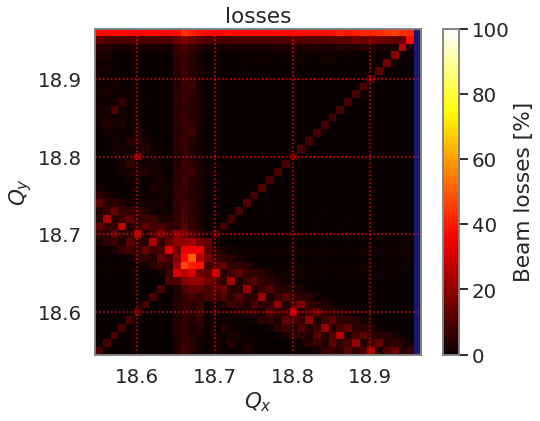

In [32]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=100,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed9_losses_100.pdf', bbox_inches='tight')

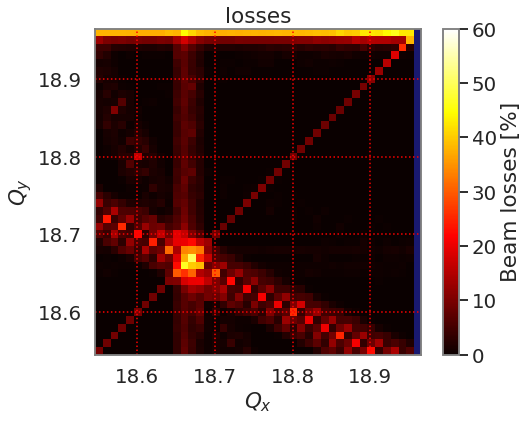

In [33]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=60,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed9_losses_60.pdf', bbox_inches='tight')

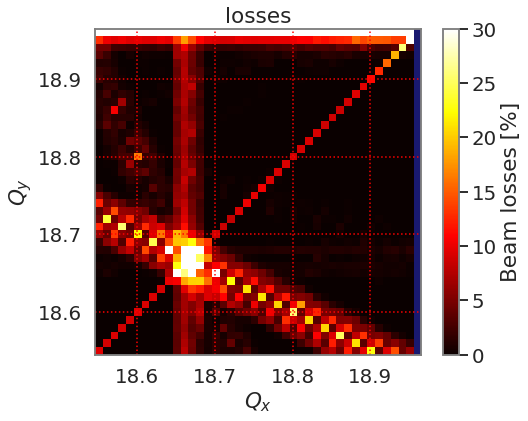

In [34]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=30,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed9_losses_30.pdf', bbox_inches='tight')

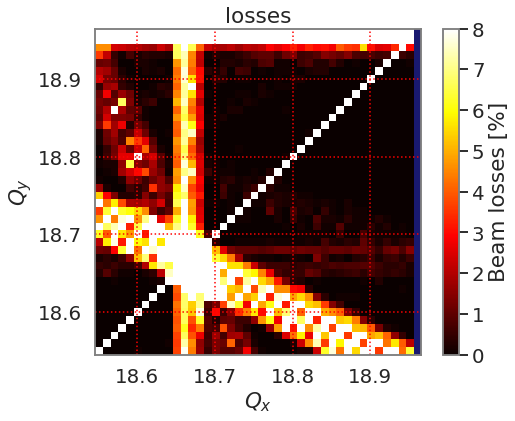

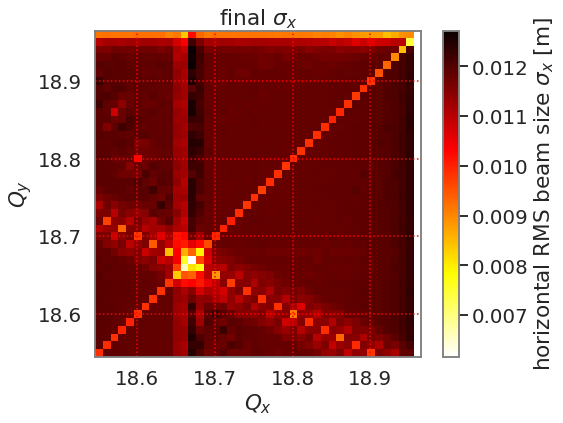

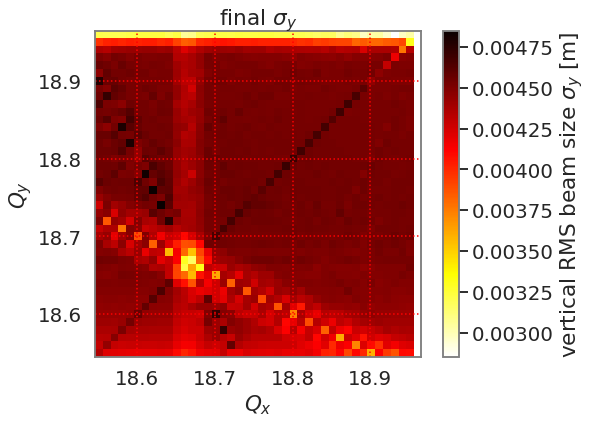

In [35]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=8,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed9_losses.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_x$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_x.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('horizontal RMS beam size $\sigma_x$ [m]')
plt.savefig('tunescan_eseed9_sigx.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_y$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_y.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('vertical RMS beam size $\sigma_y$ [m]')
plt.savefig('tunescan_eseed9_sigy.pdf', bbox_inches='tight')

# `e_seed = 2`

In [46]:
tune_range_qx = np.arange(18.55, 18.95 + 0.01, 0.01)
tune_range_qy = tune_range_qx

e_seed = 2

In [47]:
pickle.load(open('results/errors_55_55_1_summary.p', 'rb'))

{'std_x': 0.007837173580444426, 'std_y': 0.0042320290805243944, 'losses': 799}

In [48]:
pickle.load(open('results/errors_55_55_2_summary.p', 'rb'))

{'std_x': 0.01031676357798351, 'std_y': 0.004299062762602449, 'losses': 927}

In [54]:
losses = np.zeros((len(tune_range_qx), len(tune_range_qy)))
std_x = np.zeros_like(losses)
std_y = np.zeros_like(losses)

for i, qx in enumerate(tune_range_qx):
    for j, qy in enumerate(tune_range_qy):
        qqx, qqy = int(np.round((qx%1) * 100)), int(np.round((qy%1) * 100))

        filename_error_table = "errors_{qqx}_{qqy}_{eseed:d}".format(
            qqx=qqx, qqy=qqy, eseed=e_seed)

        try:
            store = pickle.load(open('results/' + filename_error_table + '_summary.p', 'rb'))
        except FileNotFoundError:
            try:
                store = pickle.load(open('results_old/' + filename_error_table + '_summary.p', 'rb'))
            except FileNotFoundError:
                losses[i, j] = np.nan
                std_x[i, j] = np.nan
                std_y[i, j] = np.nan
                continue
        
        losses[i, j] = store['losses']
        std_x[i, j] = store['std_x']
        std_y[i, j] = store['std_y']

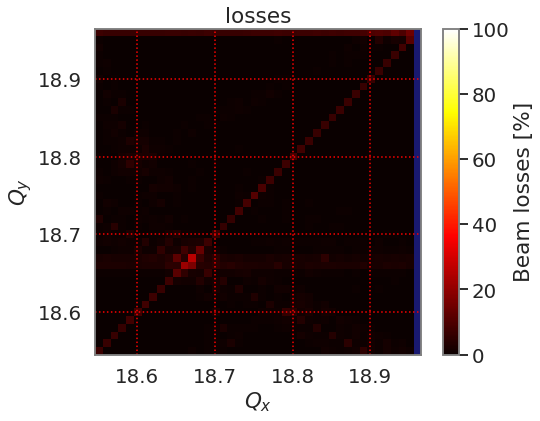

In [55]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=100,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed{}_losses_100.pdf'.format(e_seed), bbox_inches='tight')

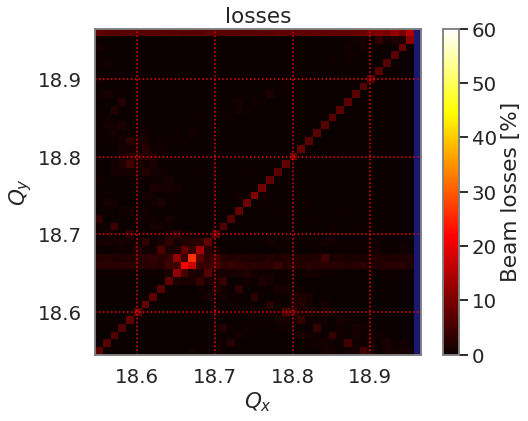

In [56]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=60,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed{}_losses_60.pdf'.format(e_seed), bbox_inches='tight')

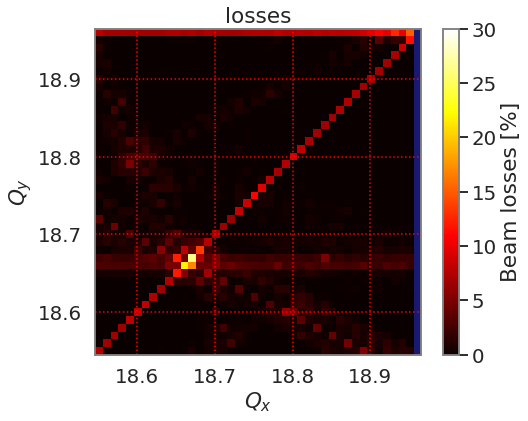

In [57]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=30,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed{}_losses_30.pdf'.format(e_seed), bbox_inches='tight')

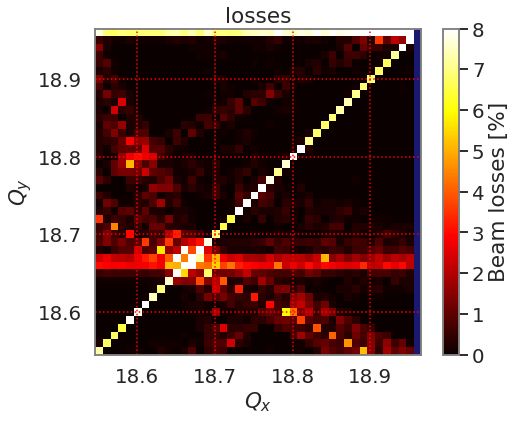

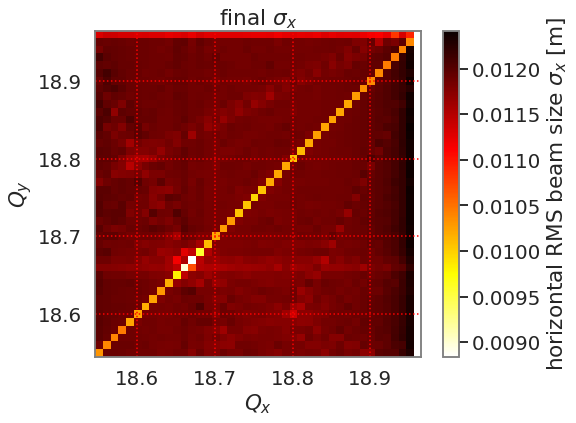

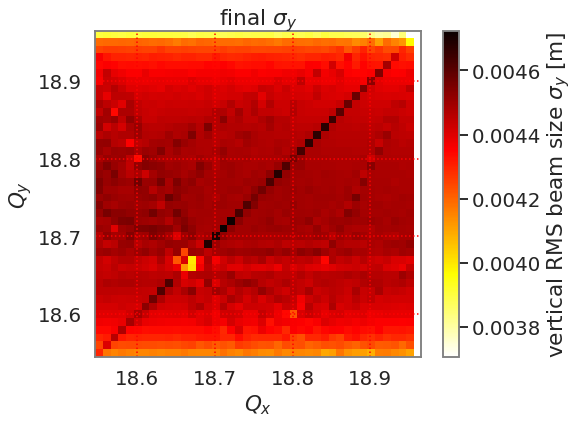

In [58]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=8,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed{}_losses.pdf'.format(e_seed), bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_x$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_x.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('horizontal RMS beam size $\sigma_x$ [m]')
plt.savefig('tunescan_eseed{}_sigx.pdf'.format(e_seed), bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_y$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_y.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('vertical RMS beam size $\sigma_y$ [m]')
plt.savefig('tunescan_eseed{}_sigy.pdf'.format(e_seed), bbox_inches='tight')